# Analyse Yearly Water Observation Summary Stats over cells

In [1]:
import os, sys

import numpy as np

from numpy import genfromtxt

import pandas as pd
#import pandas.io.data
from pandas_datareader import data, wb
from pandas import DataFrame


%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')


from pylab import rcParams
rcParams['figure.figsize'] = 10, 10 # increase plot size a bit...
rcParams['axes.formatter.useoffset'] = False  # disable scalar formatter / offset in axes labels

In [2]:
infile='wofsstats_by_cell_yearly_Oct2Sept_2D_Grids.csv'

#my_file_csv = os.path.join('/Softdata/data/water_extents', infile) 
my_file_csv = os.path.join('/home/547/fxz547/myGithub/geodanalytics/data', infile) 

print(my_file_csv)

/home/547/fxz547/myGithub/geodanalytics/data/wofsstats_by_cell_yearly_Oct2Sept_2D_Grids.csv


# Using Pandas  to handle heterogeneous tabular data structure with labeled axes 
http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook

In [3]:
pdf = pd.read_csv(my_file_csv)

In [4]:
pdf['waterpct'] = (100.0*pdf.waterobs)/pdf.clearobs

In [5]:
pdf.head()

,year,longitude,latitude,waterpix,clearpix,waterobs,clearobs,waterpct
0,2014,144,-16,212647,12237774,1192606,162951368,0.731878
1,1987,143,-33,73606,15998159,203443,223908841,0.090860
2,1987,144,-42,10394,1635415,17123,2995284,0.571665
3,1987,123,-35,6989,21195,15135,55136,27.450305
4,1987,129,-16,782258,14238574,4656771,203970601,2.283060


In [6]:
pdf.shape

(26784, 8)

In [7]:
pdf.dtypes


year           int64
longitude      int64
latitude       int64
waterpix       int64
clearpix       int64
waterobs       int64
clearobs       int64
waterpct     float64
dtype: object

In [8]:
# Group by year, the sum the values in each group
df_aus_yearly=pdf.groupby('year').sum()

In [9]:
df_aus_yearly['clearobs'].sum()  # 5x10^12 clear pix obs over 28 years

5133012185249

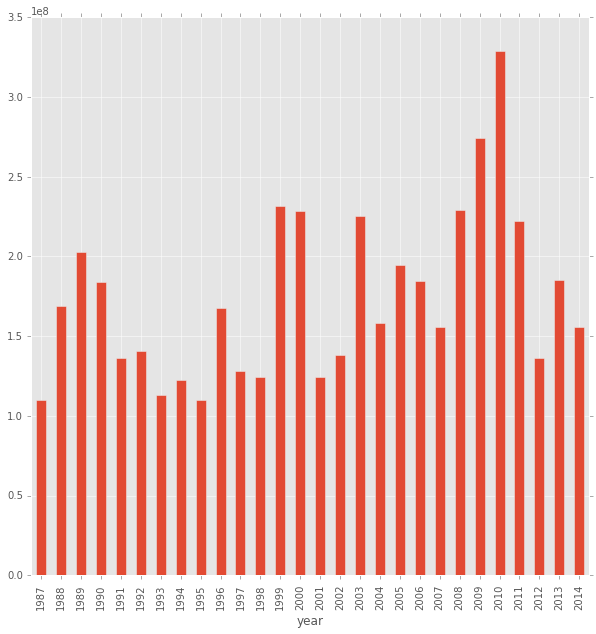

In [10]:
# Unique water pixels of water over years in Australia continent, showing a peak at 2010, the year with plenty rainfall
df_aus_yearly['waterpix'].plot(kind='bar')

In [11]:
# Percentage of water observed. Or frequency of observing water.
# shows peak in 2000 and 2010. 10 year draught in between.
df_aus_yearly['waterpct'] = 100.0*df_aus_yearly.waterobs/df_aus_yearly.clearobs

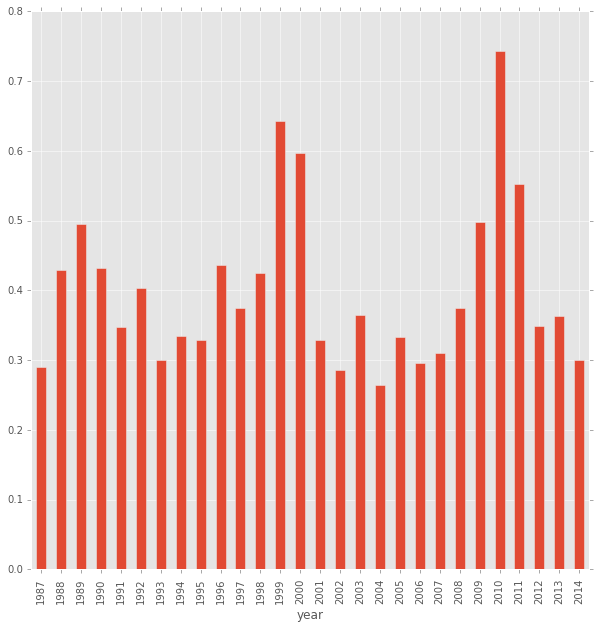

In [12]:
# The percentage of Water Pixel Obs, showing a peak in 2010, the year break draught
df_aus_yearly['waterpct'].plot(kind='bar')

# the In-land region Canberra, impacted by 10-year draught clearly seen

In [13]:
# select rows with conditions
# http://stackoverflow.com/questions/15315452/selecting-with-complex-criteria-from-pandas-dataframe

In [14]:
#select certain rows
my_long =149  #Canberra
my_lat=-36

df_cell= pdf[pdf['longitude']==my_long ].set_index('year')

In [15]:
df_cell.head()

,longitude,latitude,waterpix,clearpix,waterobs,clearobs,waterpct
year,,,,,,,
1987,149,-29,726334,15999505,1081557,214615202,0.503952
1987,149,-35,33135,13885253,111526,106080561,0.105133
1987,149,-37,69169,11139440,347937,77651757,0.448074
1987,149,-36,142665,12237061,360660,86501369,0.416941
1987,149,-30,236388,15998109,649214,148814119,0.436258


In [16]:
dfcell = df_cell[df_cell.latitude ==my_lat]

In [17]:
dfcell.head()

,longitude,latitude,waterpix,clearpix,waterobs,clearobs,waterpct
year,,,,,,,
1987,149,-36,142665,12237061,360660,86501369,0.416941
1988,149,-36,300977,12231948,1594460,87621302,1.819717
1989,149,-36,299262,12163924,1022815,52532470,1.947015
1990,149,-36,335708,12236919,2476140,114248730,2.167324
1991,149,-36,468122,12221562,1476507,68383127,2.159169


In [18]:
dfcell.shape

(28, 7)

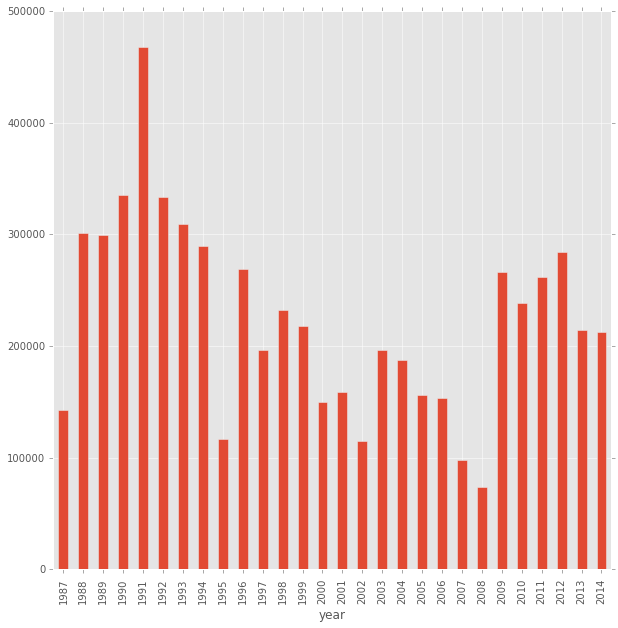

In [19]:
dfcell['waterpix'].plot(kind='bar')  # Unique water pixels observed yearly

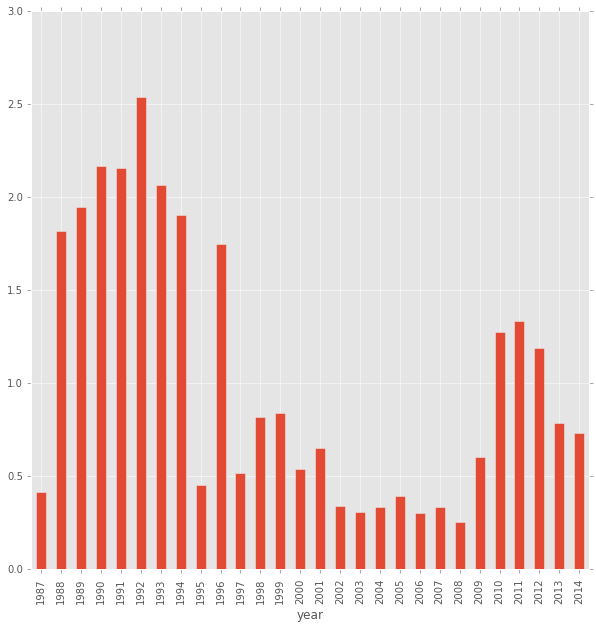

In [21]:
# the In-land region Canberra, impacted by 10-year draught clearly seen

dfcell['waterpct'].plot(kind='bar') 

# Focus a cell (lan, lon)

In [35]:
def focus_cell(lon,lat):
    
    latlonmask= (pdf['latitude'] == lat) & (pdf['longitude']==lon)  #select certain rows
    
    df_cell = pdf.loc[latlonmask]

    #df_cell['waterpct'] = 100.0*df_cell.waterobs/df_cell.clearobs
    
    df_cell['waterpct'].plot(kind='bar') 
    
    return df_cell


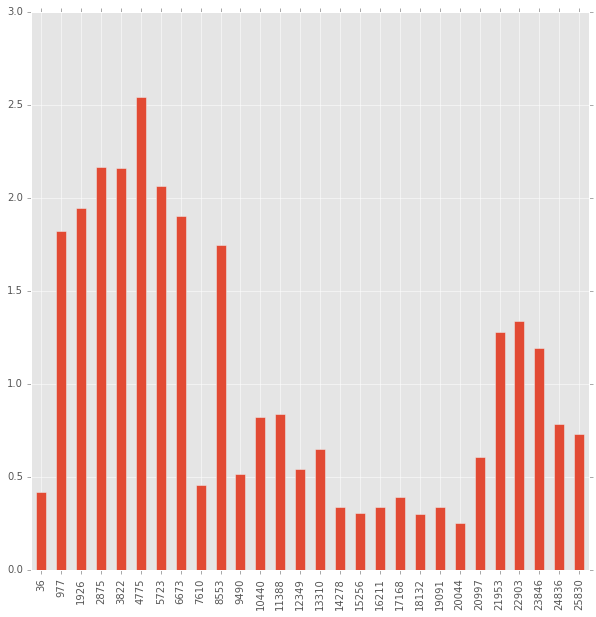

In [36]:

my_df = focus_cell(149, -36)

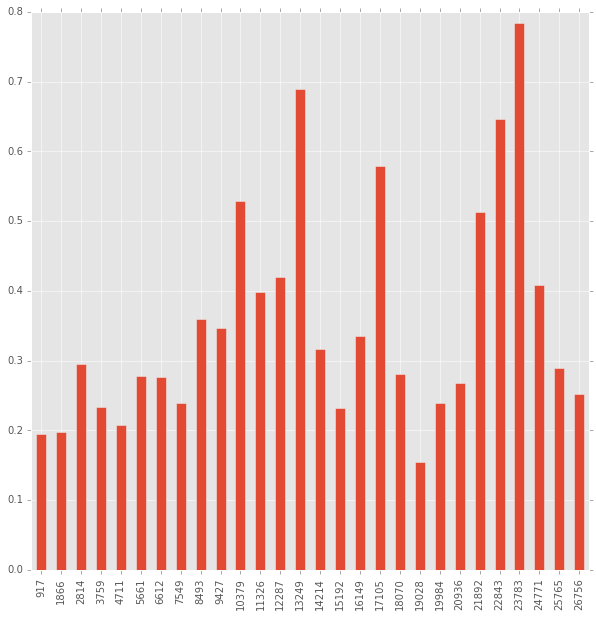

In [37]:

my_df = focus_cell(149, -31)

In [25]:
# http://www.bom.gov.au/climate/updates/articles/a010-southern-rainfall-decline.shtml

In [38]:
my_df.head()


,year,longitude,latitude,waterpix,clearpix,waterobs,clearobs,waterpct
917,1987,149,-31,101830,15951004,297142,152319034,0.195079
1866,1988,149,-31,97403,15951070,356916,180339314,0.197914
2814,1989,149,-31,168579,15950995,407943,138055259,0.295493
3759,1990,149,-31,143771,15951137,474868,203370048,0.233499
4711,1991,149,-31,82045,15951080,399848,192262068,0.207970


In [39]:
X_MIN = pdf.longitude.min()
X_MAX =pdf.longitude.max()

Y_MIN= pdf.latitude.min()
Y_MAX= pdf.latitude.max()

print (X_MIN, X_MAX)
print(Y_MIN, Y_MAX)

(112, 153)
(-45, -11)


In [28]:
YSIZE=  Y_MAX - Y_MIN +1
XSIZE= X_MAX - X_MIN +1
mywater=np.zeros((YSIZE, XSIZE), float)

In [190]:
def water_year(ayear):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    #ayear=2010
    
    mywater=np.empty((YSIZE, XSIZE), float)  #empty has weired value .zero if want a particular value 0
    mywater.fill(np.nan)  # initialize with np.nan, then other functions will take it as no-value

    pdf_ayear = pdf.loc[pdf['year'] == ayear]


    #pdf_ayear.head()

    # iterate a pandas data frame over rows
    for index, row in pdf_ayear.iterrows():
        #print (row.year, row.longitude, row.latitude, row.waterpix)
        
        #mywater[Y_MAX - row.latitude, row.longitude-X_MIN] = row.waterpix
        
        mywater[Y_MAX - row.latitude, row.longitude-X_MIN] = row.waterpct
        
#         if  row.clearobs ==0 :
#             pass
#             #print (row.year, row.longitude, row.latitude, row.clearobs)
#         else:
#             mywater[Y_MAX - row.latitude, row.longitude-X_MIN] = (100.0*row.waterobs)/row.clearobs

    
    plt.figure()
    ax = plt.gca()
    im = ax.imshow(mywater, interpolation='none', vmin=0, vmax=10, cmap='jet')  # for percentage
    #im = ax.imshow(mywater,  vmin=0, vmax=10000000, cmap='jet')  #interpolation='none',
    plt.grid(False)


# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)

    plt.colorbar(im, cax=cax)
    
    return mywater

In [46]:
ayear=pdf.year.min()

1988


/g/data1/u46/users/fxz547/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


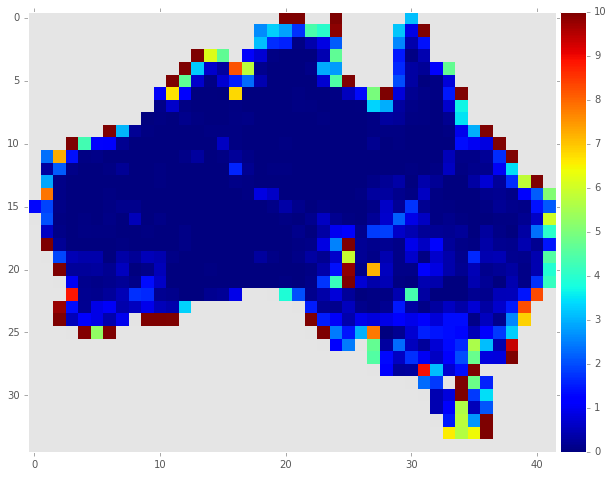

In [217]:
print (ayear)
mywater = water_year(ayear)
ayear +=1
if ayear >= pdf.year.max():
    ayear = pdf.year.min()


In [221]:
mask= mywater>=1

In [33]:
mask.shape

(35, 42)

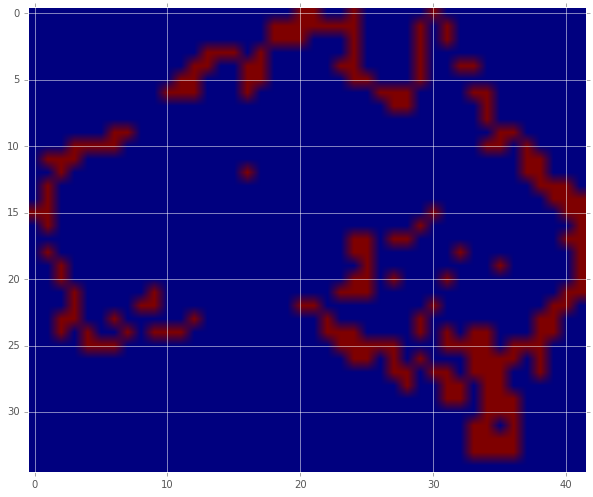

In [222]:
plt.imshow(mask)